# GRIP-The Sparks Foundation
 Name-Razeena Naaz

## Task-1 : Prediction using Supervised ML
 Description: Predict the percentage of a student based on the no.of study hours. This is a simple linear regression task involving 2 variables. We use python programming language to predicted score if a student studies for 9.25 hrs/ day.

### Importing libraries required

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing the dataset
data = 'http://bit.ly/w-data'
df = pd.read_csv(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [99]:
# Finding the datatypes of the columns
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [100]:
#Columns present in dataset
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [101]:
# Some basic stats of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Visualizing the dataset

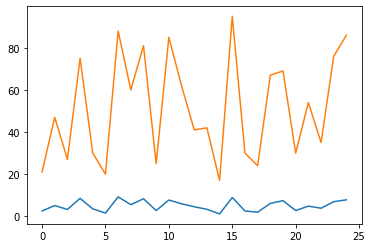

In [52]:
#Understanding the 2 variables of the dataset
plt.plot(df)

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <BarContainer object of 10 artists>)

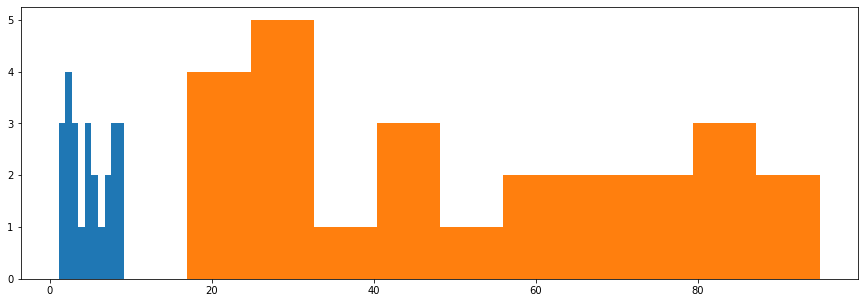

In [53]:
#Visualizing distribution of values of the variables
plt.figure(figsize=(15,5))
plt.hist(x=df['Hours'])
plt.hist(x=df['Scores'])

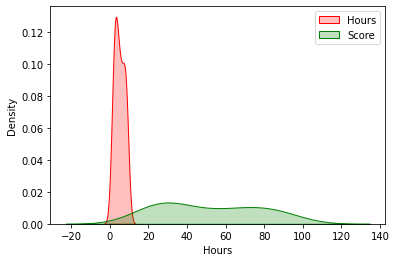

In [54]:
ax = sns.kdeplot(df.Hours,color="Red", shade = True)
ax = sns.kdeplot(df.Scores,ax =ax, color="Green", shade= True)
ax.legend(["Hours","Score"],loc='upper right')

c:\users\naaz\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

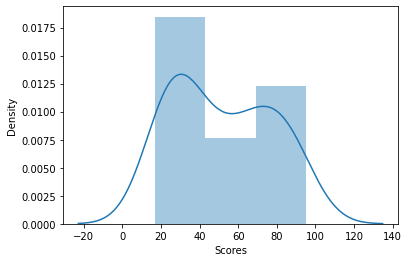

In [55]:
sns.distplot(df.Scores, norm_hist=True)
#This graph depicts a normal distribution 

c:\users\naaz\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Scores'>

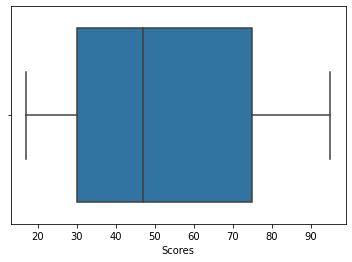

In [56]:
sns.boxplot(df.Scores)
#This graph depicts that no outliers are present

Text(0, 0.5, 'Score')

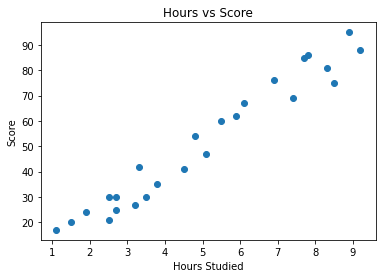

In [57]:
# Plotting the distribution of scores
plt.scatter(x=df.Hours, y=df.Scores)  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
#This graph depicts a linear reationship btw the 2 variables

### Machine learning Application

In [77]:
#Splitting the dataset
from sklearn.model_selection import train_test_split  
X = df.Hours.values
X=X.reshape(-1, 1)
y = df.Scores
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [78]:
#Applying Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

C=model.coef_
I=model.intercept_
print(f"Coefficient is {C} and intercept is {I}")

Coefficient is [9.91065648] and intercept is 2.018160041434669


In [82]:
predictions = model.predict(x_test)
# Comparision
comp = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
comp

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [92]:
#Evaluating the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics  

print('RMSE score:', mean_squared_error(y_test, predictions))
print('R2 score:', r2_score(y_test, predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

RMSE score: 21.598769307217413
R2 score: 0.9454906892105355
Mean Absolute Error: 4.18385989900298


Text(0, 0.5, 'Score')

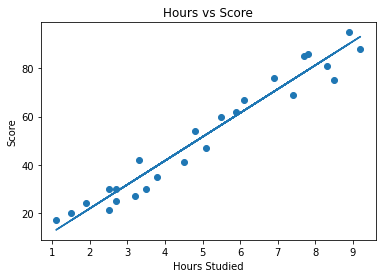

In [93]:
# Plotting the fitted model
line = C*X + I
plt.scatter(x=df['Hours'], y=df['Scores'])
plt.plot(df['Hours'], line)
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score') 

In [98]:
# Final Step
print(f"The predicted score for a student who studies for 9.25 hours/day is {model.predict([[9.25]])}")

The predicted score for a student who studies for 9.25 hours/day is [93.69173249]
